In [83]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colormaps

In [84]:
# 读取数据
df = pd.read_csv('C:/Users/10942/project/diffusion_model/attention_aware_diffusion/out/GRN_inference_result_500_STRING.txt',sep='\t')  # 替换成你的实际文件名

In [85]:
df

,TF,Target,WeightOfEdge
0,HESX1,SIX6,0.014586
1,SIX6,HESX1,0.014543
2,SOX3,HAND2,0.014518
3,SOX3,NKX3-1,0.014486
4,TRIM22,SIX6,0.014474
...,...,...,...
311782,LIN28A,ERCC-00096,-0.007612
311783,LIN28A,ERCC-00171,-0.007671
311784,LIN28A,ERCC-00004,-0.007784
311785,SOX4,NTS,-0.007946


In [93]:

# 计算绝对值并排序，选择前 N 条
N = 100  # 这里修改成你想保留的边数
df_top = df.iloc[df['WeightOfEdge'].abs().sort_values(ascending=True).index[:N]]

print(f"筛选了绝对值最大的前 {N} 条边，用于绘图")



筛选了绝对值最大的前 100 条边，用于绘图


In [94]:
df_top

,TF,Target,WeightOfEdge
152700,DNMT3B,FLRT2,2.900964e-10
152699,ESPL1,LIFR,3.541534e-10
152701,ASXL1,ANKRD1,-4.492701e-10
152702,MCM6,PA2G4,-5.866008e-10
152698,RFXANK,PHLDA1,6.471297e-10
...,...,...,...
152749,NR0B1,CD200,-1.666096e-08
152653,BMPR1A,VASH2,1.666110e-08
152750,ZEB1,SH3RF1,-1.668826e-08
152652,XRCC5,SMARCD3,1.693635e-08


In [79]:
# 构建有向图
G = nx.DiGraph()

for _, row in df_top.iterrows():
    source = row['TF']
    target = row['Target']
    weight = row['WeightOfEdge']
    G.add_edge(source, target, weight=weight)

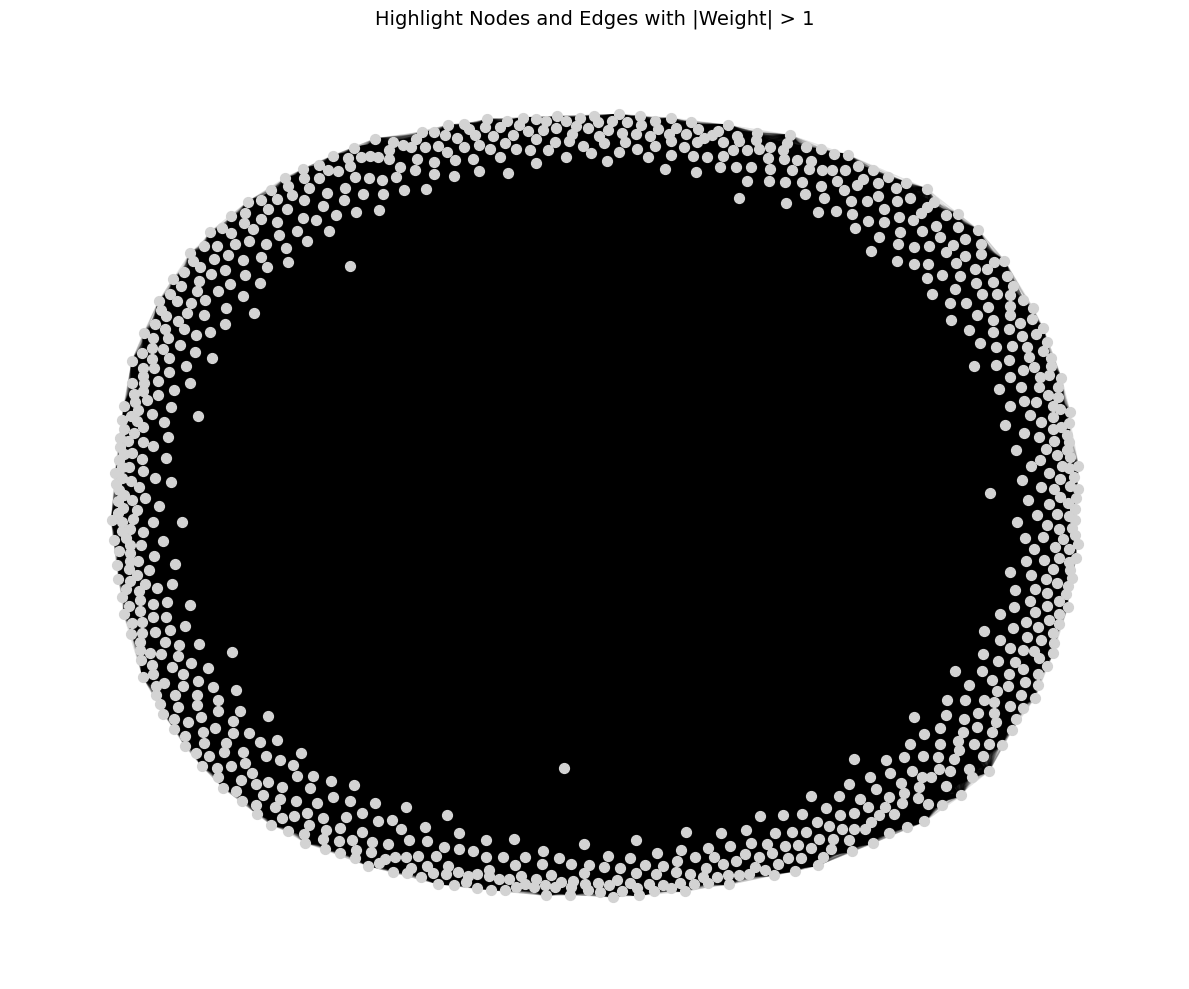

In [86]:
# 获取边颜色和宽度
edge_colors = []
edge_widths = []

for u, v, data in G.edges(data=True):
    weight = data['weight']
    if weight > 0:
        edge_colors.append('red')   # 正相关：红色
    else:
        edge_colors.append('blue')  # 负相关：蓝色
    edge_widths.append(abs(weight) * 20)  # 可调整倍率

# 布局
pos = nx.spring_layout(G, seed=42)

# 绘图
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightgray', edgecolors='black')
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, arrows=True, arrowstyle='-|>', arrowsize=30)

plt.title(f"Top {N} Edges by Absolute Weight", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()